# AIRBNB EDA ANALYSIS

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

DATASET LINK:- https://www.kaggle.com/datasets/alexanderfreberg/airbnb-listings-2016-dataset?select=Tableau+Full+Project.xlsx

## IMPORTING DATASET

In [2]:
df_calendar =pd.read_excel('/content/Tableau Full Project.xlsx',sheet_name="Calendar")
df_listings =pd.read_excel('/content/Tableau Full Project.xlsx',sheet_name="Listings")
df_reviews =pd.read_excel('/content/Tableau Full Project.xlsx',sheet_name="Review")
df =pd.read_excel('/content/Tableau Full Project.xlsx')

## DATA PROFILING

In [3]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [4]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,host_id,host_url,host_name,host_since,host_location,...,maximum_nights,calendar_updated,has_availability,number_of_reviews,review_scores_rating,requires_license,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
4,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",...,90,today,True,43,96.0,False,False,strict,t,6


In [6]:
df_calendar.shape

(1048575, 4)

In [7]:
df_reviews.shape

(84849, 6)

In [8]:
df_listings.shape

(17826, 45)

In [9]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1048575 non-null  int64         
 1   date        1048575 non-null  datetime64[ns]
 2   available   1048575 non-null  bool          
 3   price       699862 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 25.0 MB


In [10]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id             84849 non-null  int64         
 2   date           84849 non-null  datetime64[ns]
 3   reviewer_id    84849 non-null  int64         
 4   reviewer_name  84849 non-null  object        
 5   comments       84830 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.9+ MB


In [11]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17826 entries, 0 to 17825
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                17826 non-null  int64         
 1   listing_url                       17826 non-null  object        
 2   scrape_id                         17826 non-null  int64         
 3   last_scraped                      17826 non-null  datetime64[ns]
 4   name                              17826 non-null  object        
 5   host_id                           17826 non-null  int64         
 6   host_url                          17826 non-null  object        
 7   host_name                         17824 non-null  object        
 8   host_since                        17824 non-null  datetime64[ns]
 9   host_location                     17812 non-null  object        
 10  host_response_time                15661 non-nu

Datatype looks OK for every column so no need to change anything

### CHECKING FOR NULL VALUES

In [12]:
df_calendar.isnull().sum()

,0
listing_id,0
date,0
available,0
price,348713


In [13]:
df_calendar.isnull().sum() * 100 / len(df_calendar)

,0
listing_id,0.000000
date,0.000000
available,0.000000
price,33.255895


More than 33% of price column is empty

In [14]:
df_calendar["price"].describe().round(2)

,price
count,699862.00
mean,140.46
std,106.49
min,10.00
25%,75.00
50%,110.00
75%,168.00
max,1650.00


AS price is a critical column we need to deal with it carefully. As 33% of the data is missing it is not liable to use mean as the replacement of it as 33% of it won't be a common number and also we just can't delete the whole column as 33% is not a major reason for considering it as deletable. So, better would be to remove the missing rows

In [15]:
df_calendar.dropna(subset=['price'], inplace=True)
display(df_calendar.isnull().sum())

,0
listing_id,0
date,0
available,0
price,0


<Axes: >

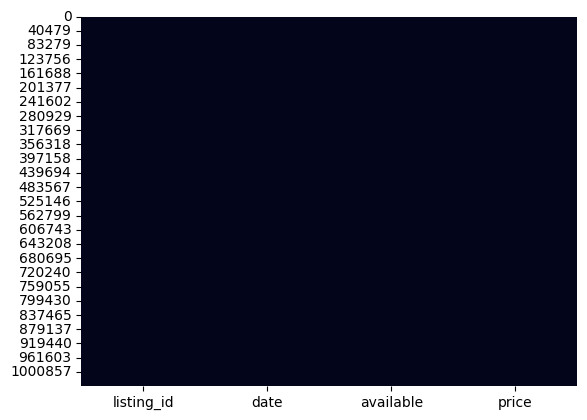

In [16]:
sns.heatmap(df_calendar.isnull(), cbar=False)

In [17]:
df_calendar.shape

(699862, 4)

In [18]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
9,241032,2016-01-13,True,85.0
10,241032,2016-01-14,True,85.0
14,241032,2016-01-18,True,85.0


Great the calendar sheet is free from any error let's move on to review sheet

In [19]:
df_reviews.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,0
comments,19


In [20]:
df_reviews.isnull().sum() * 100 / len(df_reviews)

,0
listing_id,0.000000
id,0.000000
date,0.000000
reviewer_id,0.000000
reviewer_name,0.000000
comments,0.022393


Very little percentage of data is missing from comment so we better remove those blank rows

In [21]:
df_reviews.dropna(subset=['comments'], inplace=True)

In [22]:
df_reviews.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,0
comments,0


<Axes: >

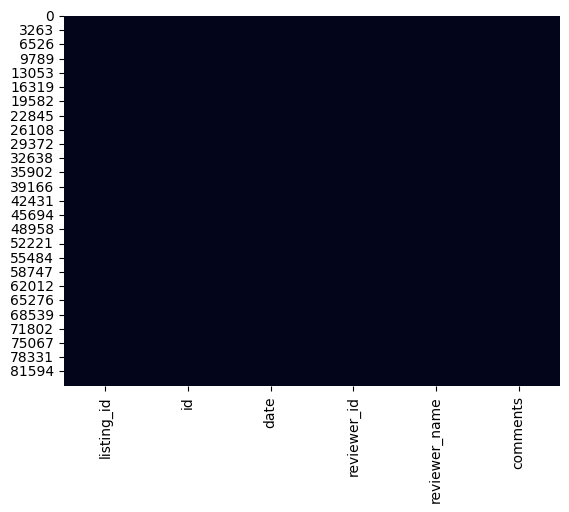

In [23]:
sns.heatmap(df_reviews.isnull(), cbar=False)

Now as the review and calendar sheets are clear let's move to the most lengthy sheet the listings

In [24]:
df_listings.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
name,0
host_id,0
host_url,0
host_name,2
host_since,2
host_location,14


In [25]:
df_listings.isnull().sum() * 100 / len(df_listings)

,0
id,0.000000
listing_url,0.000000
scrape_id,0.000000
last_scraped,0.000000
name,0.000000
host_id,0.000000
host_url,0.000000
host_name,0.011220
host_since,0.011220
host_location,0.078537


In [26]:
df_listings.shape

(17826, 45)

<Axes: >

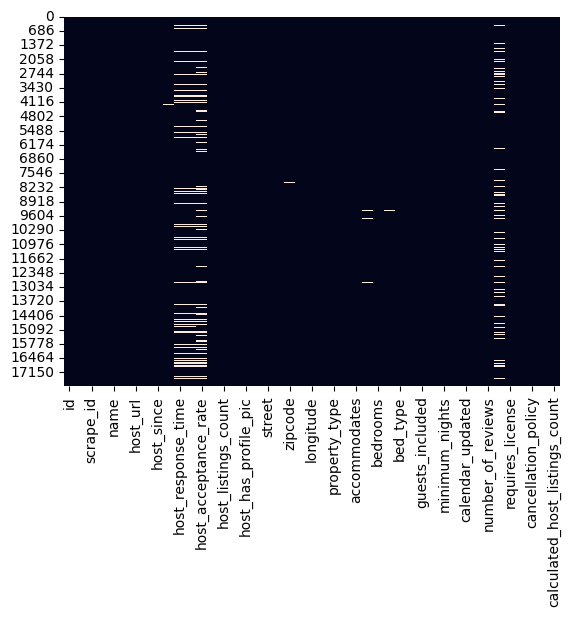

In [27]:
sns.heatmap(df_listings.isnull(), cbar=False)

Most of the blanks are insignificant in percentage and we just can't delete the whole column as these were already filtered from the not so useful columns so we better remove all the blanks from dataset

In [28]:
df_listings.dropna(inplace=True)

In [29]:
df_listings.shape

(12852, 45)

In [30]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,host_id,host_url,host_name,host_since,host_location,...,maximum_nights,calendar_updated,has_availability,number_of_reviews,review_scores_rating,requires_license,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
4,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",...,90,today,True,43,96.0,False,False,strict,t,6


<Axes: >

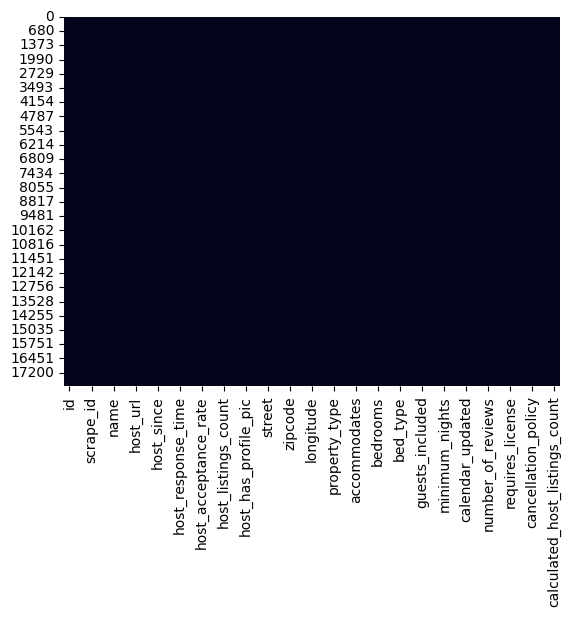

In [31]:
sns.heatmap(df_listings.isnull(), cbar=False)

Now we have dealt with the data cleaning and standardization part. Next we move on to the EDA part

In [32]:
df_calendar.duplicated().sum()

np.int64(0)

In [33]:
df_listings.duplicated().sum()

np.int64(0)

In [34]:
df_reviews.duplicated().sum()

np.int64(0)

No duplicates found. Good thing

## EDA

In [35]:
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

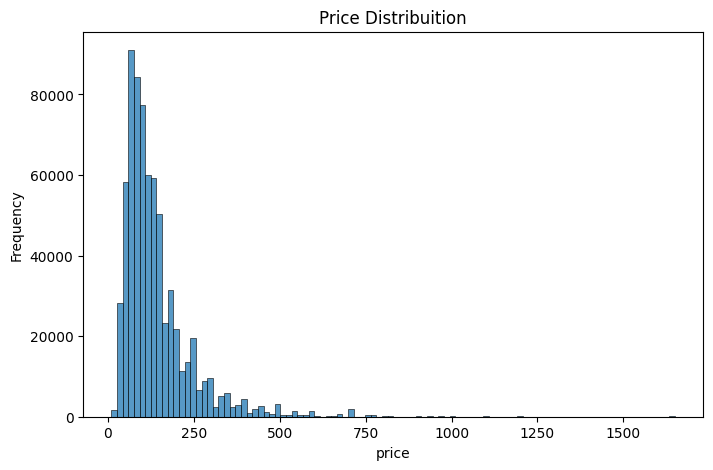

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_calendar, x='price', bins=100)
plt.title('Price Distribuition')
plt.ylabel("Frequency")
plt.show()

Most Price ranges between 25 to 175

In [37]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'number_of_reviews', 'review_scores_rating',
       'requires_license', 'instant_bookable', 'cancellation_policy',
       'require_guest_phone_verification', 'calculated_host_listings_count'],
      dtype='object')

In [41]:
df_listings.groupby(by='neighbourhood')['price'].mean()

,price
neighbourhood,
Ballard,122.944379
Beacon Hill,85.388521
Capitol Hill,121.230560
Cascade,136.400862
Central Area,119.234412
Delridge,78.455285
Downtown,153.172857
Interbay,80.923077
Lake City,95.198795


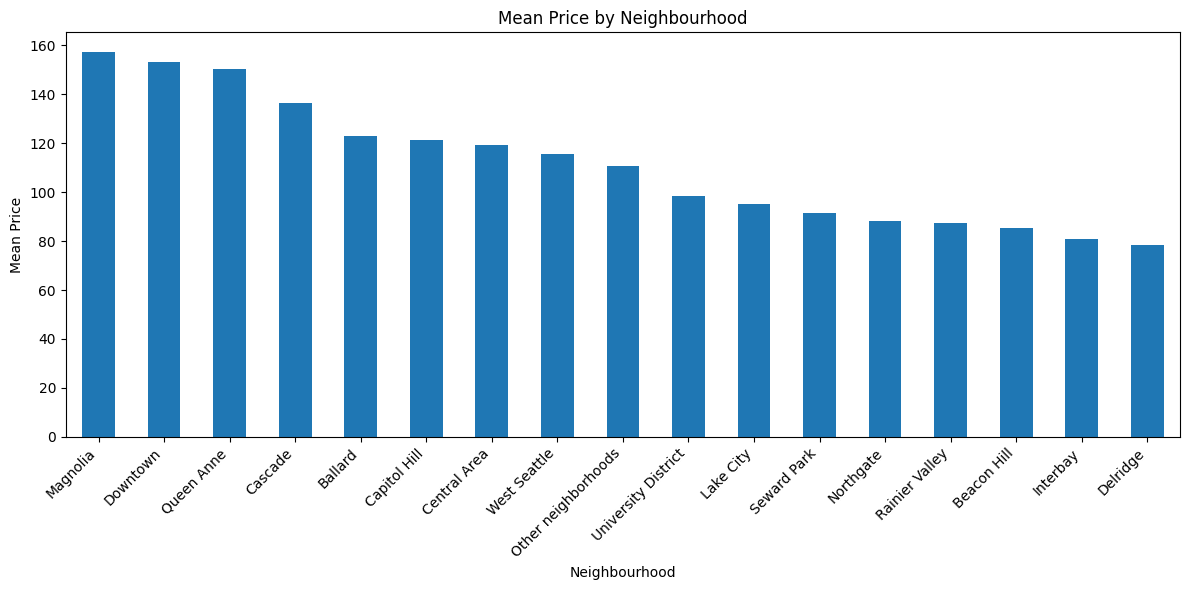

In [44]:
mean_price_by_neighbourhood = df_listings.groupby(by='neighbourhood')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
mean_price_by_neighbourhood.plot(kind='bar')
plt.title('Mean Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Magnolia,Downntown,Queen Anne has the topmost position by average price

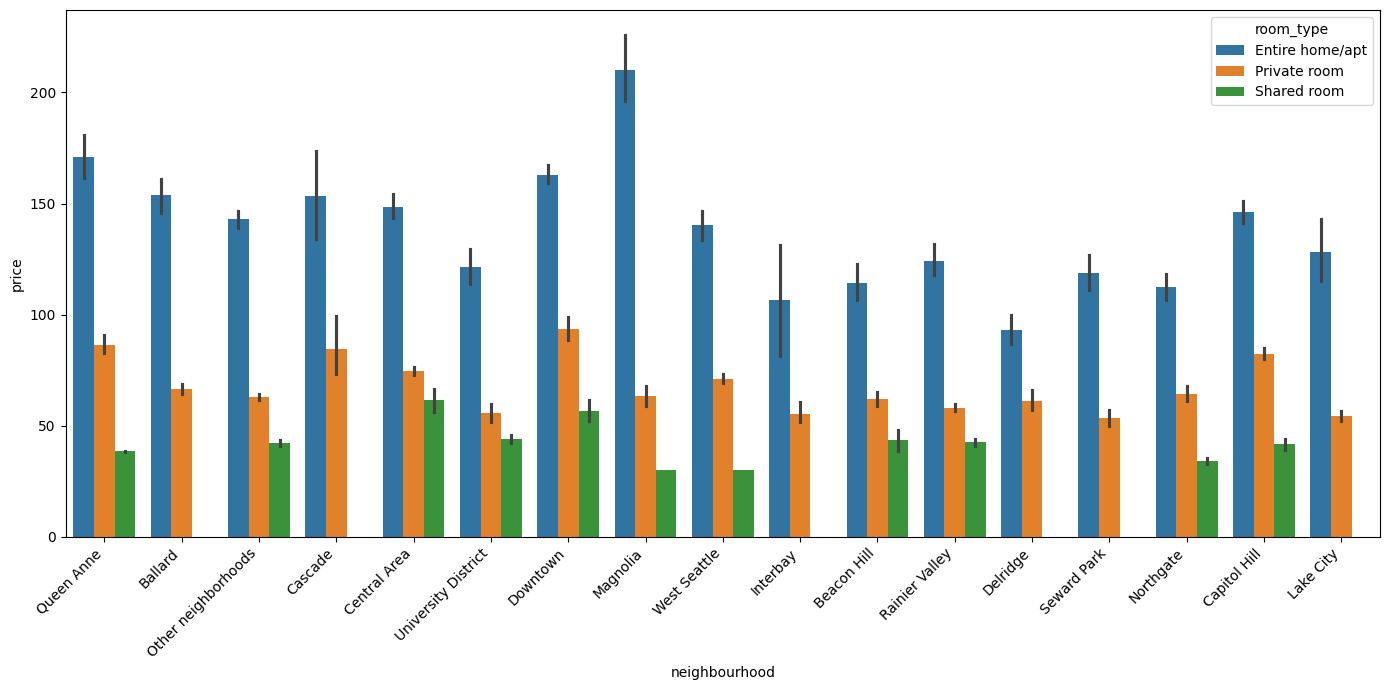

In [45]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df_listings, x='neighbourhood', y='price', hue='room_type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In every places Entire room/apt is dominating followed by private room and then share room

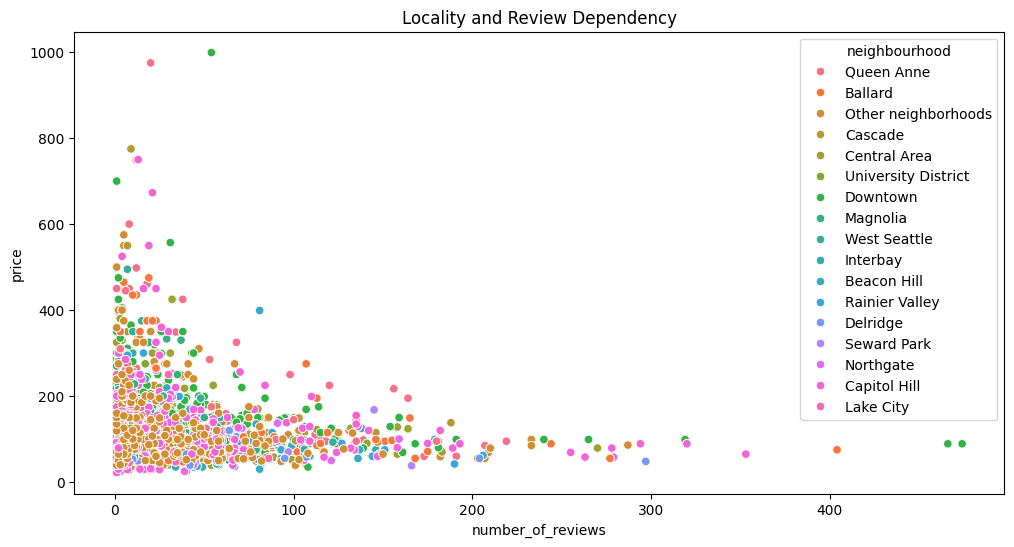

In [49]:
# number of reviews and price relationship
plt.figure(figsize=(12, 6))
plt.title("Locality and Review Dependency")
sns.scatterplot(data=df_listings, x='number_of_reviews', y='price', hue='neighbourhood')
plt.show()

Many of the highest-priced listings sit at very low review counts while highly reviewed listings cluster at mid-range prices, revealing a strong dynamic in which price ceilings drop sharply as reviews increase, and neighborhood alone doesnt break this pattern

In [50]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'number_of_reviews', 'review_scores_rating',
       'requires_license', 'instant_bookable', 'cancellation_policy',
       'require_guest_phone_verification', 'calculated_host_listings_count'],
      dtype='object')

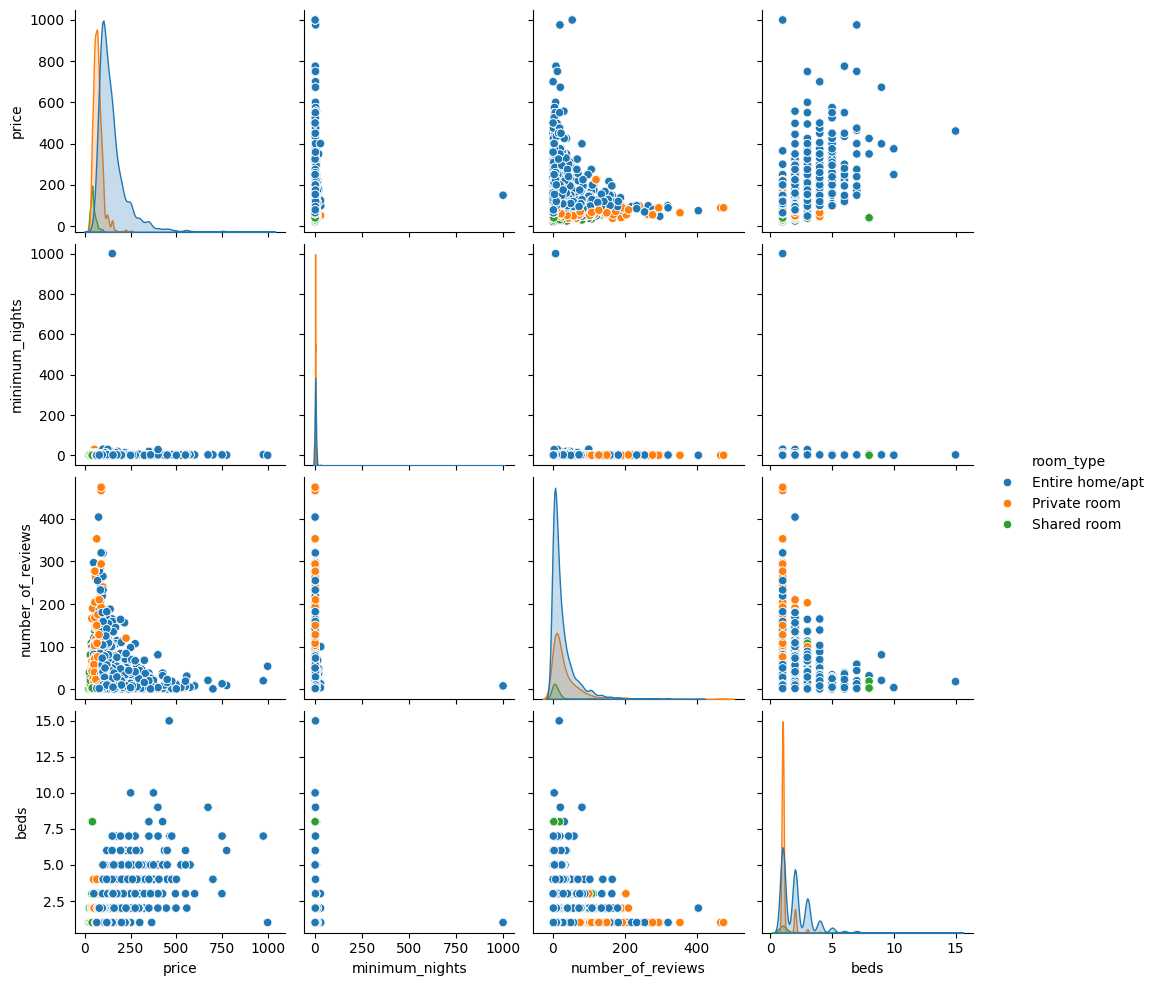

In [52]:
sns.pairplot(data=df_listings, vars=['price', 'minimum_nights', 'number_of_reviews', 'beds'], hue='room_type')

Price vs reviews shows a pronounced inverse pattern: the highest prices occur at very low review counts, while listings with many reviews concentrate at lower to mid-range prices, indicating that demand scale favors affordable options over premium units for accumulating reviews

Entire home/apt dominates the dataset across all variables; these listings span the full price range and review counts, whereas private and shared rooms cluster at lower prices with moderate reviews, implying room_type is a strong factor of market segment

Minimum nights is heavily rightskewed with most listings requiring very short stays; extreme minimum-night outliers correlate with very few reviews, suggesting strict stay policies dampen review volume and likely bookings

Beds has a light positive association with price but not with reviews; larger homes command higher prices yet dont systematically earn more reviews, pointing to capacity-driven pricing without proportional engagement gains

Joint distributions reveal dense vertical bands at low prices and low minimum nights, with dispersed outliers (very high price, very high minimum nights, or very high beds) that rarely overlap with high review counts—prime candidates for pricing or policy optimization.

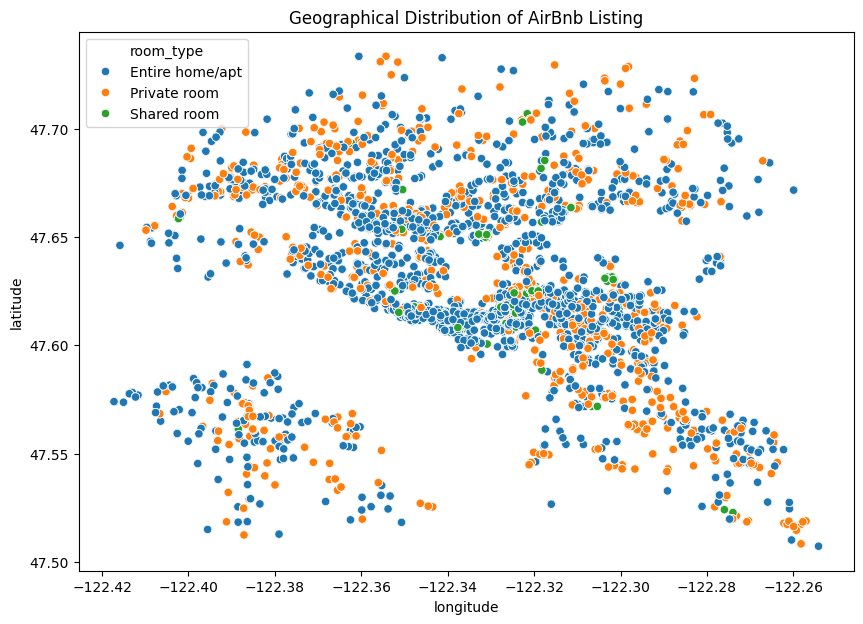

In [53]:
#Geographical Distribution of AirBnb Listing
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_listings, x='longitude', y='latitude', hue='room_type')
plt.title("Geographical Distribution of AirBnb Listing")
plt.show()

Entire-home/apartment listings dominate the map and cluster most densely in the central, indicating that the core area is saturated with full-unit rentals while private and shared rooms are more diffusely scattered toward the edges of the city

In [58]:
corr = df_listings[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
           'bathrooms','bedrooms', 'beds']].corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,bathrooms,bedrooms,beds
latitude,1.000000,-0.212322,0.016516,-0.000797,-0.031146,-0.003715,0.060384,0.040338
longitude,-0.212322,1.000000,-0.105274,0.003227,-0.024499,-0.007650,-0.043331,-0.074429
price,0.016516,-0.105274,1.000000,0.023545,-0.118115,0.507886,0.632487,0.618291
minimum_nights,-0.000797,0.003227,0.023545,1.000000,-0.014721,0.005778,0.010458,0.000169
number_of_reviews,-0.031146,-0.024499,-0.118115,-0.014721,1.000000,-0.102024,-0.109886,-0.107491
bathrooms,-0.003715,-0.007650,0.507886,0.005778,-0.102024,1.000000,0.585575,0.515951
bedrooms,0.060384,-0.043331,0.632487,0.010458,-0.109886,0.585575,1.000000,0.745378
beds,0.040338,-0.074429,0.618291,0.000169,-0.107491,0.515951,0.745378,1.000000


<Axes: >

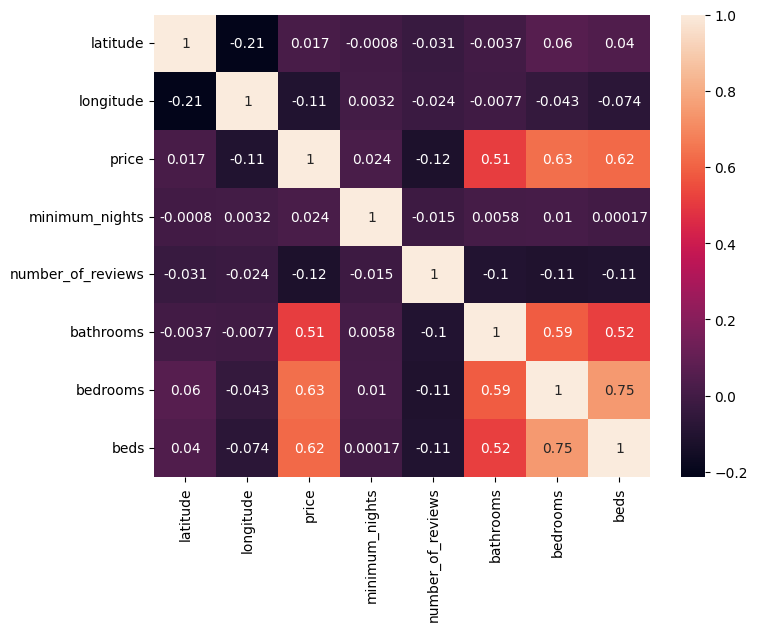

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True)

Price is most strongly driven by property size: it correlates highly with bedroomsand beds, with a moderate link to bathrooms, while reviews and location coordinates show near-zero relationship

Number_of_reviews has a slight negative correlation with price, implying lower-priced listings tend to accumulate more reviews, whereas higher-priced places often have fewer reviews

In [60]:
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [61]:
df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [64]:
df_calendar['available'].value_counts()

,count
available,
True,699862


<Axes: xlabel='date', ylabel='price'>

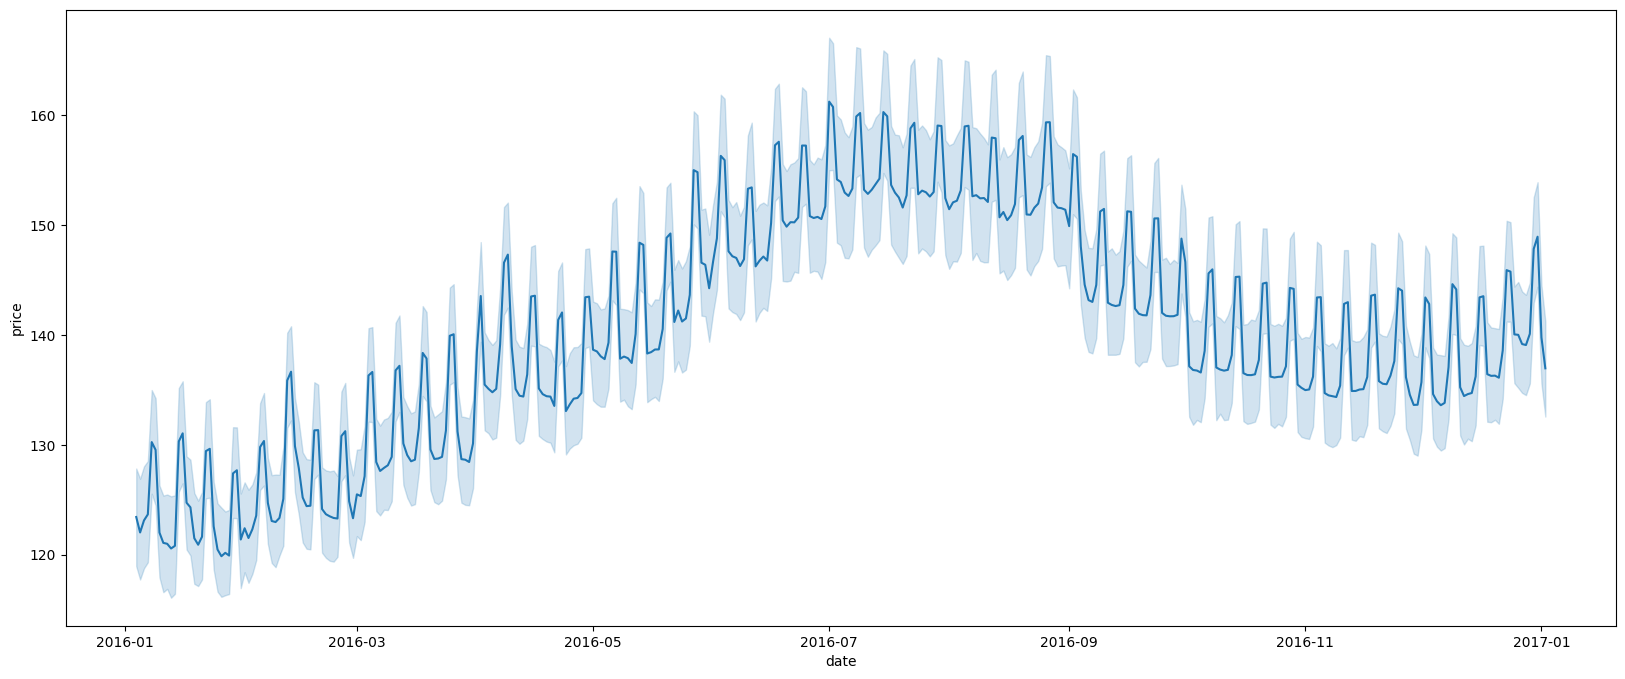

In [65]:
# show price effect in the different dates

plt.figure(figsize=(20,8))
sns.lineplot(data=df_calendar,x="date",y="price")

Peak time mid june to august end

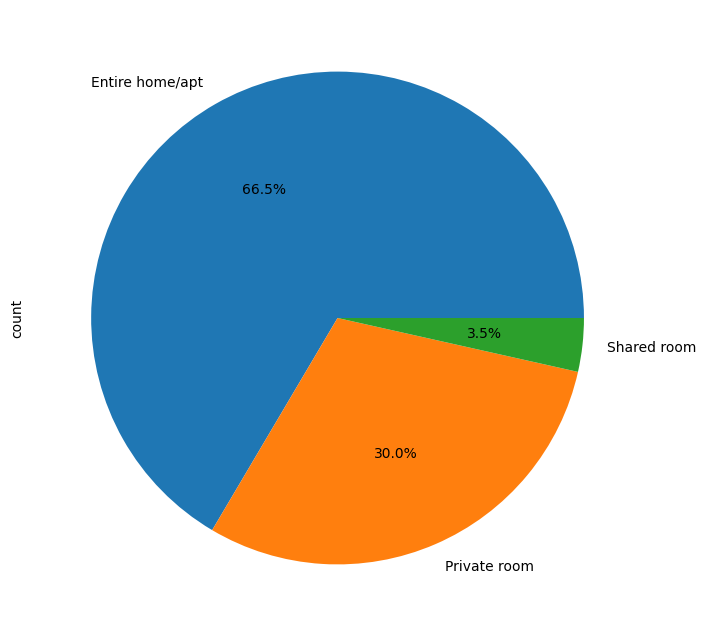

In [66]:
plt.figure(figsize = [8, 8])
df_listings["room_type"].value_counts().plot.pie( autopct='%1.1f%%');

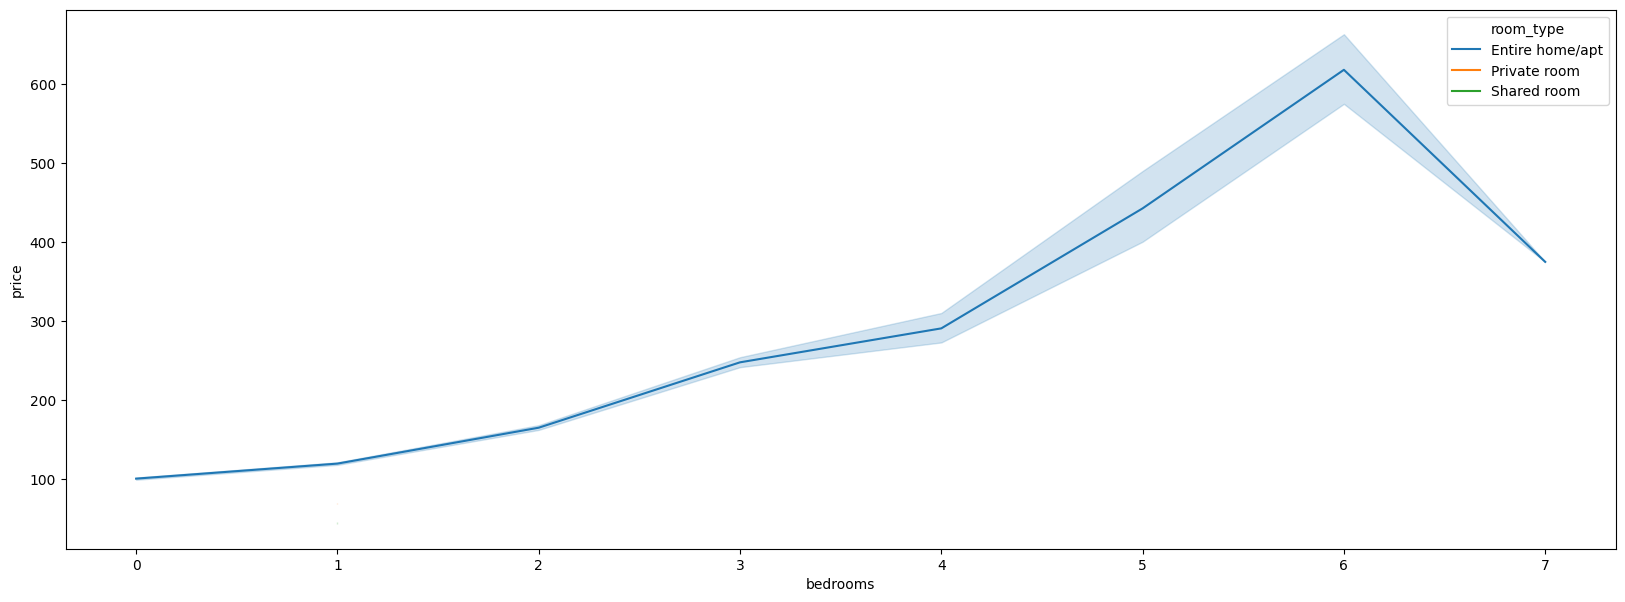

In [69]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_listings, x="bedrooms",y="price",hue="room_type")
plt.show()

Price generally rises with bedroom count, but the spread widens sharply after 2 - 3 bedrooms, indicating larger entire homes command higher ceilings yet also show high variability, so size boosts potential price but market heterogeneity drives wide dispersion

<Axes: xlabel='date'>

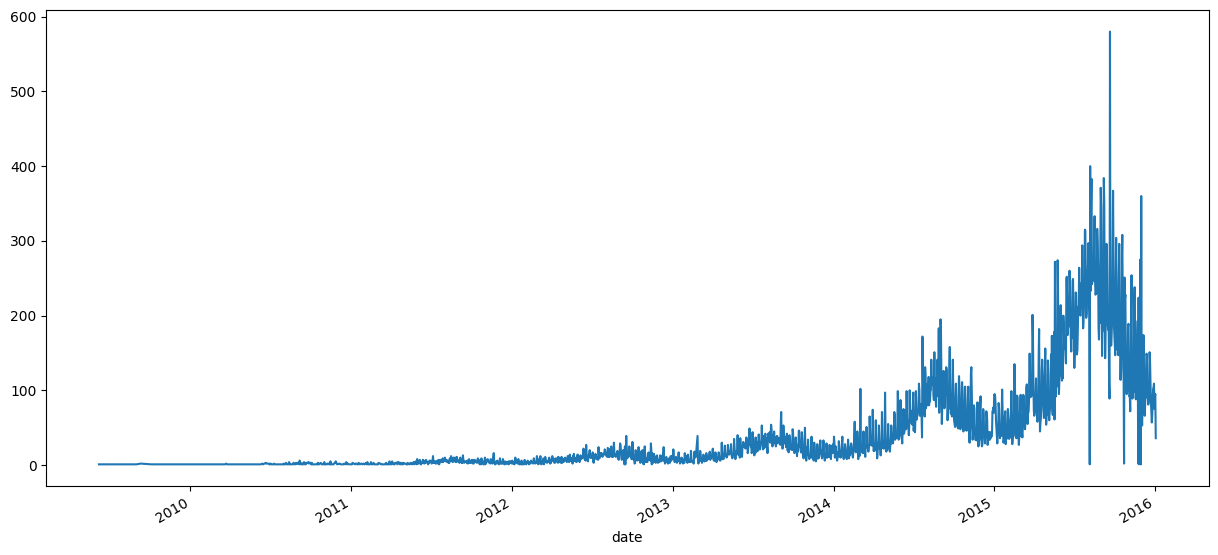

In [70]:
# How many comments depends on date

df_reviews.groupby("date")["comments"].count().plot(figsize=(15,7))

Past 2014 review writing was not a normal thing

In [71]:
# Length of word in sentence
df_reviews['Length'] = df_reviews['comments'].str.len()
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Length
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,53
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,414
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",410
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,278
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,346


In [72]:
df_reviews['Length'].describe().round(2)

,Length
count,84830.00
mean,389.82
std,304.06
min,1.00
25%,193.00
50%,316.00
75%,496.00
max,3556.00


<Axes: xlabel='date', ylabel='Length'>

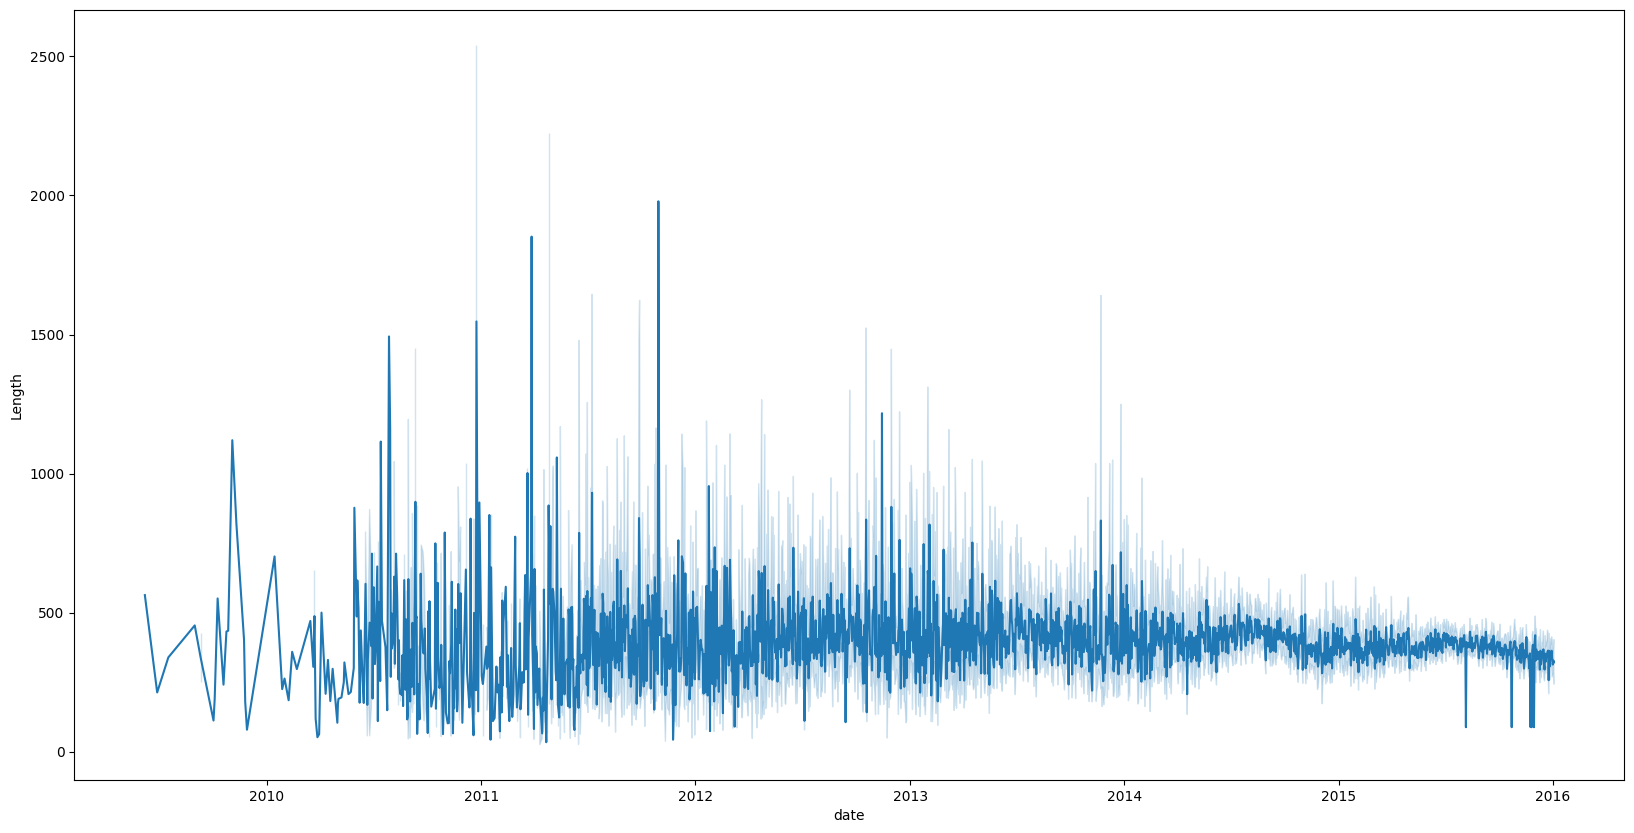

In [73]:
# any relation between length comments and date

plt.figure(figsize=(20,10))
sns.lineplot(data=df_reviews, x="date",y="Length")

Interesting insight people started writing small length reviews post 2014

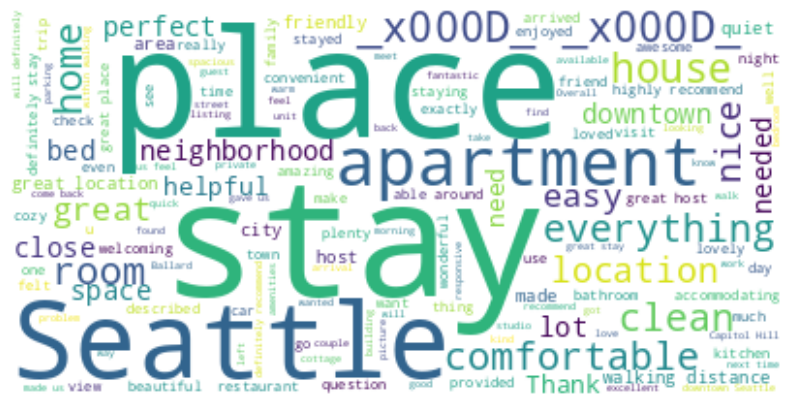

In [76]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(review for review in df_reviews.comments)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [77]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,host_id,host_url,host_name,host_since,host_location,...,maximum_nights,calendar_updated,has_availability,number_of_reviews,review_scores_rating,requires_license,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States",...,365,4 weeks ago,True,207,95.0,False,False,moderate,f,2
4,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",...,90,today,True,43,96.0,False,False,strict,t,6


In [78]:
df_listings.to_excel('new_listings.xlsx', index=False)

In [79]:
df_calendar.to_excel('new_calendar.xlsx', index=False)

In [80]:
df_reviews.to_excel('new_reviews.xlsx', index=False)

# THANK YOU